# Lab 3

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
class Explorer:
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.cat_cols, self.quan_cols = self.check_variables()

    def check_variables(self):
        # Get categorical and quantitative variables

        cols = self.data.columns
        quantitative_cols = self.data._get_numeric_data().columns
        categorical_cols = list(set(cols) - set(quantitative_cols))
        return categorical_cols, list(set(quantitative_cols))
    
    def sbs_box_plot(self, x, y):
        # Plot side by side box plot
        summary_stats = self.data.groupby(x)[y].describe()[['mean', 'min', '25%', '50%', '75%', 'max']].reset_index()
        print(f'{x} VS {y}')
        display(summary_stats)
        plt.figure()
        ax = sns.boxplot(x=x, y=y, data=self.data, order=set(self.data[x].values.tolist()))
        plt.title(f'({x},{y}) Box Plot')
        plt.show()

    def tw_table(self, x, y):
        # Print two way table
        display(pd.crosstab(self.data[x], self.data[y]))

    def double_bar_plot(self, x, y):
        # Calculate condition percentage
        self.data['percentage'] = self.data.groupby([x, y]).transform('size') / self.data.groupby(y).transform('size')
        # Plot double bar cahart
        plt.figure()
        ax = sns.barplot(x=x, y='percentage', hue=y, data=self.data)
        for c in ax.containers:
            plt.bar_label(c, fmt=lambda x: f'{round(100*x, 2)}%')
        plt.title(f'({x},{y}) Double Bar')
        plt.show()

    def lr_scatter(self, x, y):
        # Plot scatter and least square regression line

        df_small = self.data #[self.data.charges <= 15000]
        # correlation
        r = np.corrcoef(df_small[x], df_small[y])[0][1]
        # calculate slope
        b = r * (np.std(df_small[y])/np.std(df_small[x]))
        # calculate intercept
        a = np.mean(df_small[y]) - b*np.mean(df_small[x])
        # regression line
        x_ = np.linspace(min(df_small[x]), max(df_small[x]))
        y_ = a + b * x_
        # plot scatter
        plt.scatter(df_small[x], df_small[y])
        # plot regression line
        plt.plot(x_, y_, '-r', label=f'{y}={round(a,3)} + {round(b,3)}*{x}')
        # Display Correlation in legend
        plt.plot(x_[0], y_[0], '-w', label=f'Correlation: {r}')
        
        plt.xlabel(x, color='#1C2833')
        plt.ylabel(y, color='#1C2833')
        plt.legend(loc='upper left')
        plt.title(f'({x},{y}) Least Square Regression')
        plt.show()

# Examine Dataset

1. There are 1338 samples and 8 columns in the dataset.  
2. There are 3 categotical variables: ['smoker', 'sex', 'region']  
3. There are 4 quantitative variables: ['bmi', 'children', 'charges', 'age']

In [69]:
exp = Explorer('insurance.csv')

In [70]:
exp.data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [71]:
exp.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [72]:
print('Categotical Variables:', exp.cat_cols)
print('Quantitative Variables:', exp.quan_cols)

Categotical Variables: ['smoker', 'sex', 'region']
Quantitative Variables: ['bmi', 'children', 'charges', 'age']


# Relationships between categorical explanatory variables and quantitative response variables

### 1. smoker VS quantitative variables

**smoker VS bmi**  
1. Generally smokers have higher bmi but not much higher than non-smokers which can be seen in min, mean, median and Q2 value.  
2. Non-smokers have more upper outliers in bmi which can be seen in the boxplot.  
  
**smoker VS children**
1. Generally smokers have more children but not much more than non-smokers which can be seen from mean value.  

**smoker VS charges**
1. Generally smokers have much higher charges than non-smokers which can be seen from min, mean, Q1, median, Q2 and max value.  
2. There are also some upper outliers in non-smokers.  

**smoker VS age**
1. Generally non-smokers have higher age than smokers which can be seen from mean, Q1, median, and Q2 value.  
2. Smokers and non-smokers have same min age and max age.


smoker VS bmi


,smoker,mean,min,25%,50%,75%,max
0,no,30.651795,15.960,26.31500,30.3525,34.43,53.13
1,yes,30.708449,17.195,26.08375,30.4475,35.20,52.58


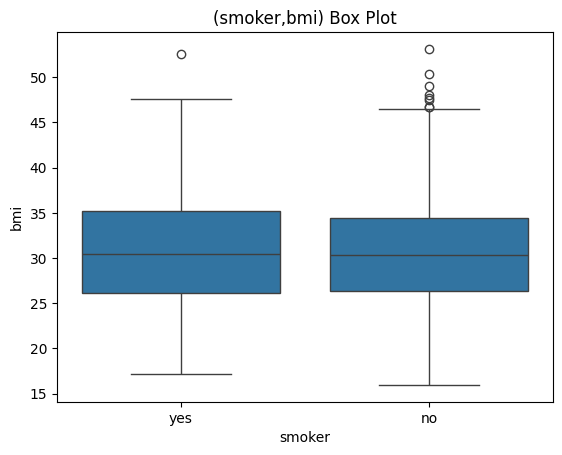

smoker VS children


,smoker,mean,min,25%,50%,75%,max
0,no,1.090226,0.0,0.0,1.0,2.0,5.0
1,yes,1.113139,0.0,0.0,1.0,2.0,5.0


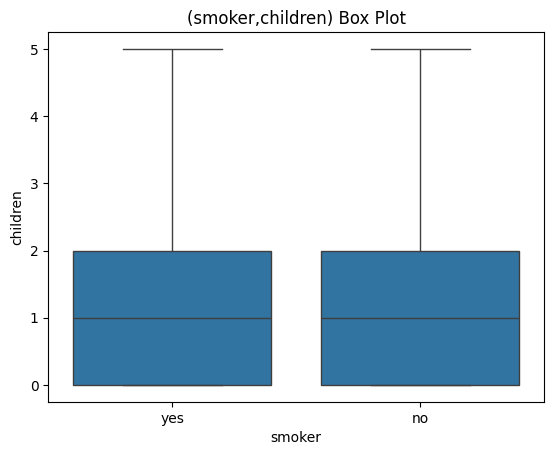

smoker VS charges


,smoker,mean,min,25%,50%,75%,max
0,no,8434.268298,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
1,yes,32050.231832,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


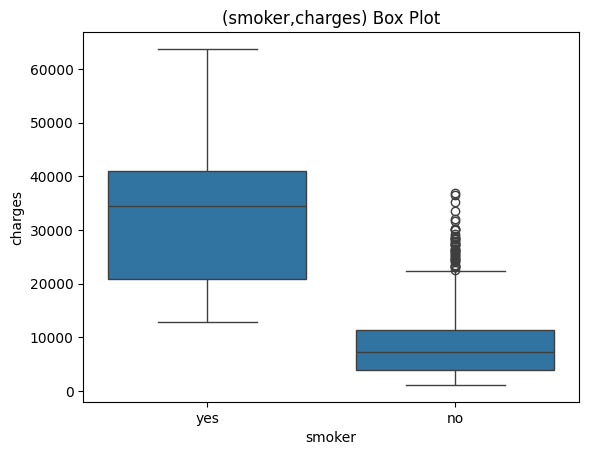

smoker VS age


,smoker,mean,min,25%,50%,75%,max
0,no,39.385338,18.0,26.75,40.0,52.0,64.0
1,yes,38.514599,18.0,27.00,38.0,49.0,64.0


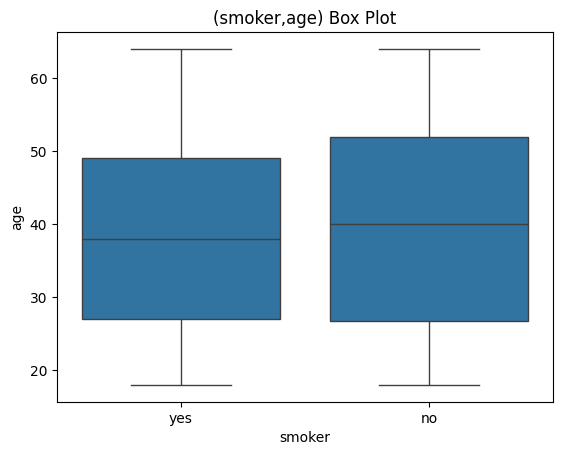

In [73]:
for q in exp.quan_cols:
    exp.sbs_box_plot('smoker', q)

### 2. sex VS quantitative variables

**sex VS bmi**  
1. Generally males have higher bmi than females but not much higher which can be seen from mean, Q1, median, Q2 and max value.  
2. Males have more higher upper outliers in bmi which can be seen in the boxplot.  
  
**sex VS children**
1. Generally males have more children but not much more than females which can be seen from mean value.  

**sex VS charges**
1. Generally males have much higher charges than females which can be seen from mean, Q2 and max value.  
2. Males and females both have many upper outliers.  

**sex VS age**
1. Generally females have higher age than males which can be seen from mean, Q1, median, and Q2 value.  
2. males and females have same min age and max age.


sex VS bmi


,sex,mean,min,25%,50%,75%,max
0,female,30.377749,16.815,26.125,30.1075,34.31375,48.07
1,male,30.943129,15.960,26.410,30.6875,34.99250,53.13


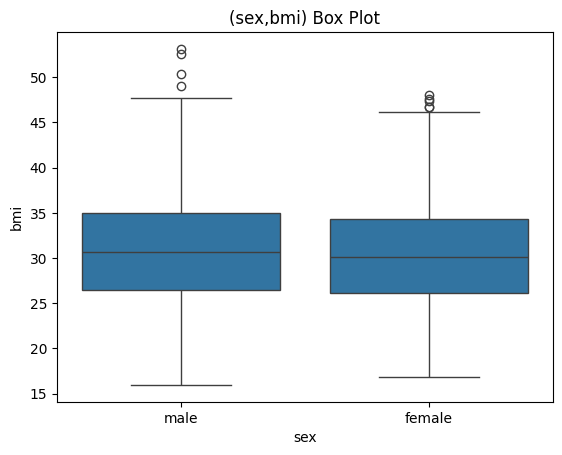

sex VS children


,sex,mean,min,25%,50%,75%,max
0,female,1.074018,0.0,0.0,1.0,2.0,5.0
1,male,1.115385,0.0,0.0,1.0,2.0,5.0


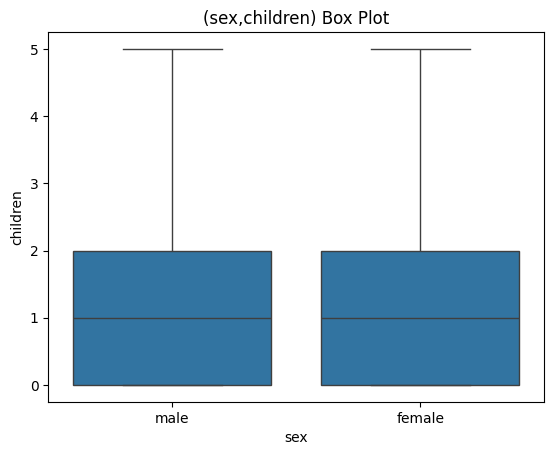

sex VS charges


,sex,mean,min,25%,50%,75%,max
0,female,12569.578844,1607.5101,4885.1587,9412.96250,14454.691825,63770.42801
1,male,13956.751178,1121.8739,4619.1340,9369.61575,18989.590250,62592.87309


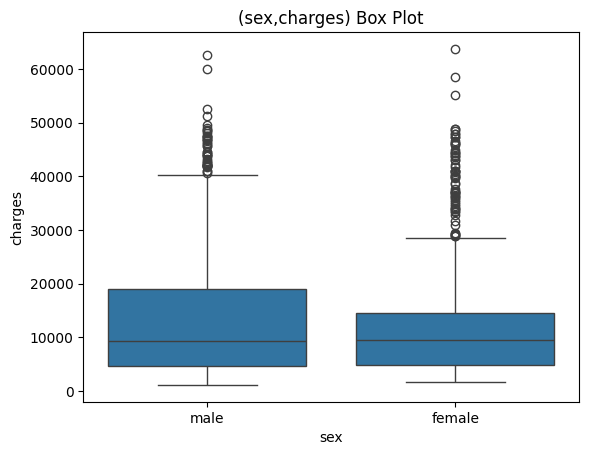

sex VS age


,sex,mean,min,25%,50%,75%,max
0,female,39.503021,18.0,27.0,40.0,51.75,64.0
1,male,38.917160,18.0,26.0,39.0,51.00,64.0


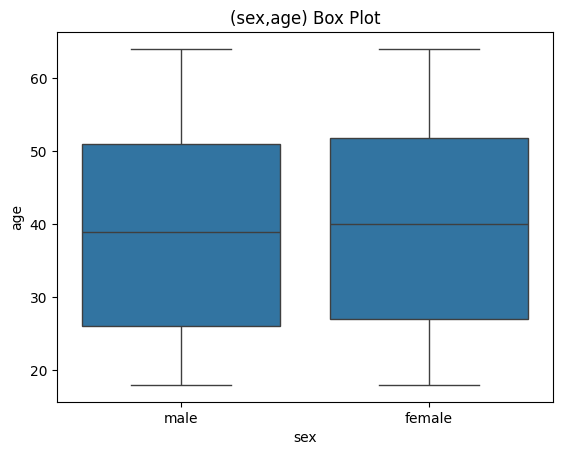

In [74]:
for q in exp.quan_cols:
    exp.sbs_box_plot('sex', q)

### region VS quantitative variables

**region VS bmi**  
1. People from southeast have the highest bmi. 
2. People from southwest have the second highest bmi.  
3. People from northeast and northwest have similar bmi.
  
**region VS children**
1. People from northwest and southwest have more children but not much more than others which can be seen from mean value.  

**region VS charges**
1. People from southeast and northeast have much higher charges than others which can be seen from mean, min, Q1, median and Q3 value.   

**region VS age**
1. People from different regions have similar age.  


region VS bmi


,region,mean,min,25%,50%,75%,max
0,northeast,29.173503,15.960,24.86625,28.88,32.89375,48.07
1,northwest,29.199785,17.385,25.74500,28.88,32.77500,42.94
2,southeast,33.355989,19.800,28.57250,33.33,37.81250,53.13
3,southwest,30.596615,17.400,26.90000,30.30,34.60000,47.60


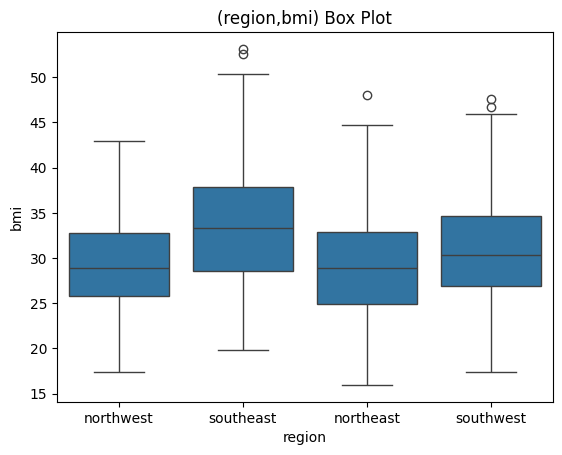

region VS children


,region,mean,min,25%,50%,75%,max
0,northeast,1.046296,0.0,0.0,1.0,2.0,5.0
1,northwest,1.147692,0.0,0.0,1.0,2.0,5.0
2,southeast,1.049451,0.0,0.0,1.0,2.0,5.0
3,southwest,1.141538,0.0,0.0,1.0,2.0,5.0


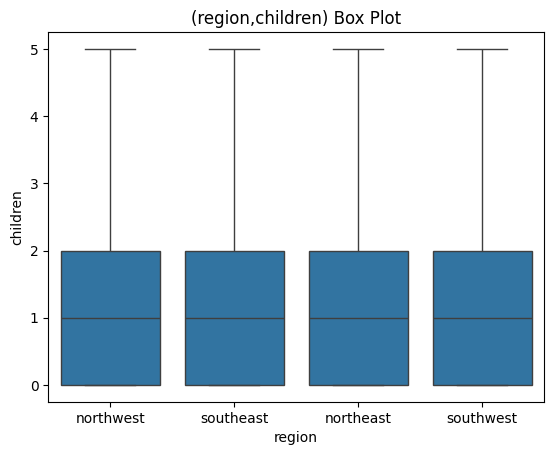

region VS charges


,region,mean,min,25%,50%,75%,max
0,northeast,13406.384516,1694.7964,5194.322288,10057.652025,16687.3641,58571.07448
1,northwest,12417.575374,1621.3402,4719.736550,8965.795750,14711.7438,60021.39897
2,southeast,14735.411438,1121.8739,4440.886200,9294.131950,19526.2869,63770.42801
3,southwest,12346.937377,1241.5650,4751.070000,8798.593000,13462.5200,52590.82939


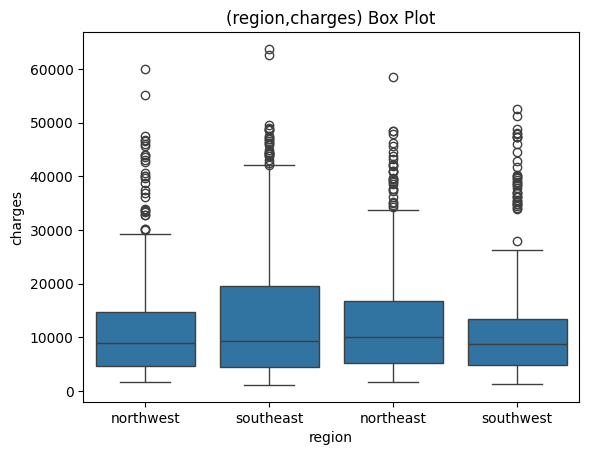

region VS age


,region,mean,min,25%,50%,75%,max
0,northeast,39.268519,18.0,27.00,39.5,51.0,64.0
1,northwest,39.196923,19.0,26.00,39.0,51.0,64.0
2,southeast,38.939560,18.0,26.75,39.0,51.0,64.0
3,southwest,39.455385,19.0,27.00,39.0,51.0,64.0


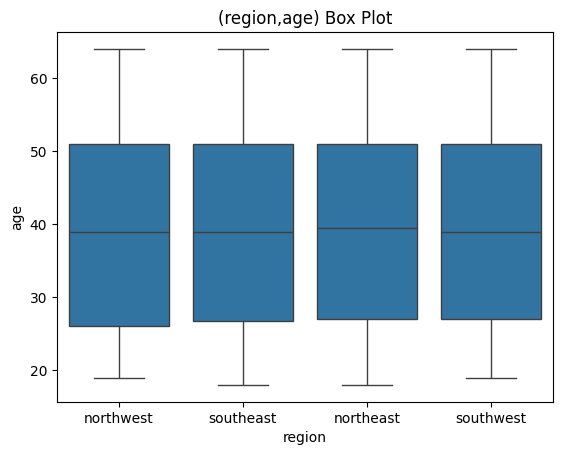

In [75]:
for q in exp.quan_cols:
    exp.sbs_box_plot('region', q)

# Examine the relationship between categorical variables

### smoker VS sex

1. 17.37% females smoke and 82.63% femals don't smoke.  
2. 23.52% females smoke and 76.48% femals don't smoke.  

sex,female,male
smoker,,
no,547,517
yes,115,159


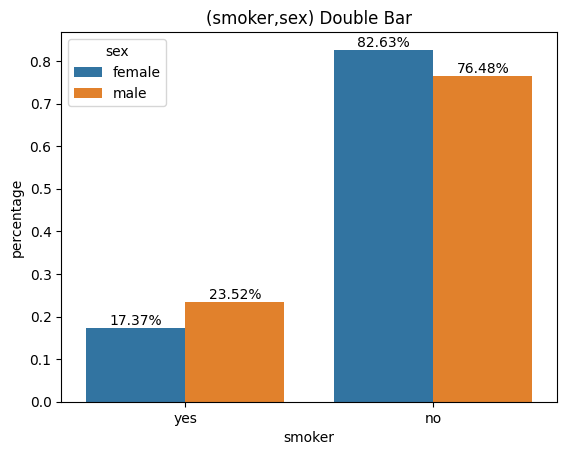

In [76]:
exp.tw_table('smoker', 'sex')
exp.double_bar_plot('smoker', 'sex')

### region VS sex

1. Females: 24.47% from southwest, 26.44% from southeast, 24.77% from northwest and 24.32% from northeast.  
2. Males: 24.11% from southwest, <span style='color:red'>27.96%</span> from southeast, 23.82% from northwest and 24.11% from northeast.  

sex,female,male
region,,
northeast,161,163
northwest,164,161
southeast,175,189
southwest,162,163


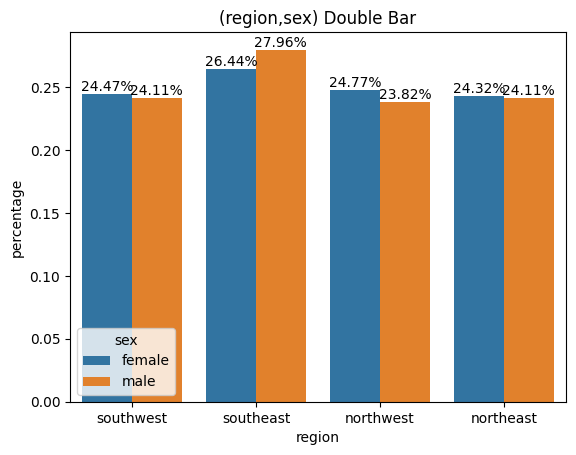

In [77]:
exp.tw_table('region', 'sex')
exp.double_bar_plot('region', 'sex')

### region VS smoker

1. Smokers: 21.17% from southwest, <span style="color:red;">33.21%</span> from southeast, 21.17% from northwest and 24.45% from northeast.  
2. Non-smokers: 25.09% from southwest, 25.66% from southeast, 25.09% from northwest and 24.15% from northeast.  

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


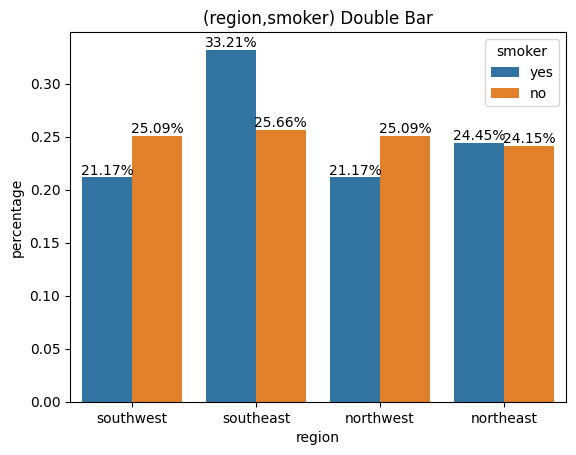

In [78]:
exp.tw_table('region', 'smoker')
exp.double_bar_plot('region', 'smoker')

# Examine the relationship between quantitative variables

### age VS bmi

1. There is a weak positive relationship between age and bmi.  
2. There are many outliers.  
3. It's linear form.  
4. The correlation is 0.109.  

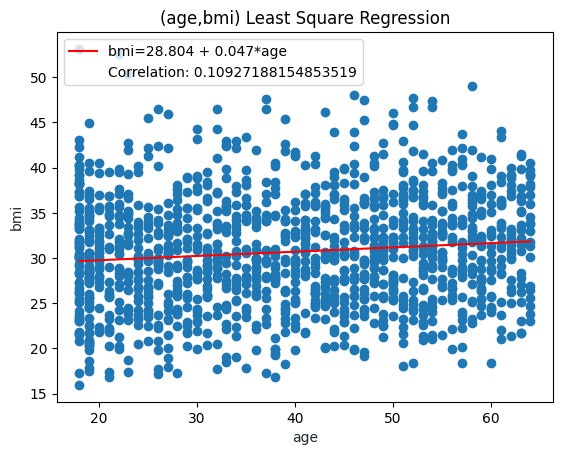

In [79]:
exp.lr_scatter('age', 'bmi')

### age VS children

1. There is a weak positive relationship between age and children.  
2. There are many outliers.  
3. It's non-linear form.  
4. The correlation is 0.042.  

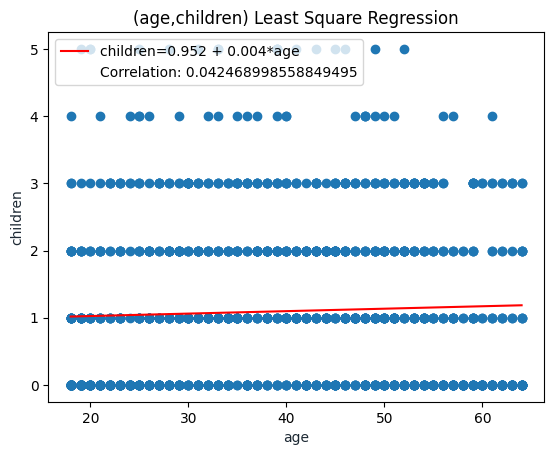

In [80]:
exp.lr_scatter('age', 'children')

### age VS charges

1. There is a weak positive relationship between age and charges.  
2. There are many outliers.  
3. It's linear form.  
4. The correlation is 0.299.  

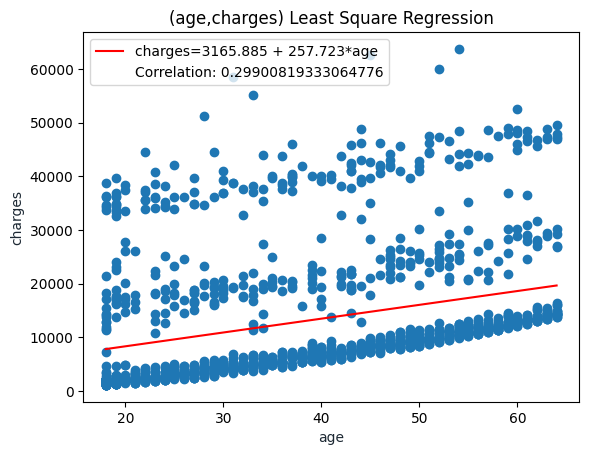

In [81]:
exp.lr_scatter('age', 'charges')

### children VS bmi

1. There is a weak positive relationship between children and bmi.  
2. There are many outliers.  
3. It's non-linear form.  
4. The correlation is 0.013.  

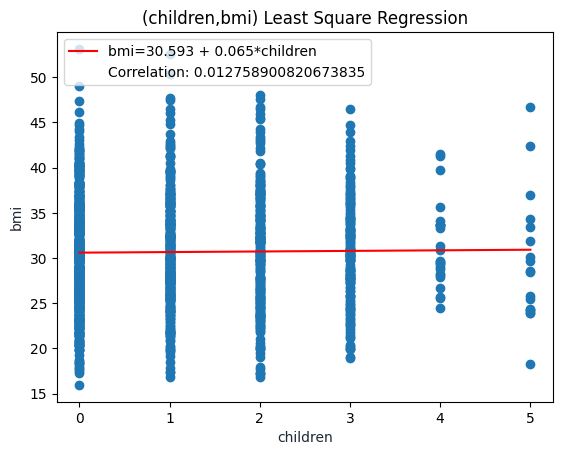

In [82]:
exp.lr_scatter('children', 'bmi')

### children VS charges

1. There is a weak positive relationship between children and charges.  
2. There are many outliers.  
3. It's non-linear form.  
4. The correlation is 0.068.  

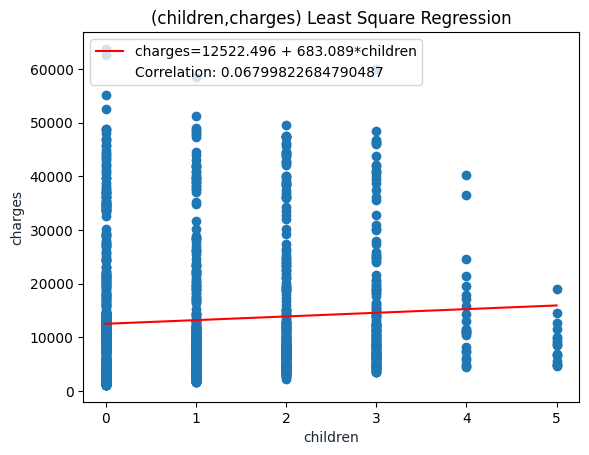

In [83]:
exp.lr_scatter('children', 'charges')

### bmi VS charges

1. There is a weak positive relationship between bmi and charges.  
2. There are many outliers.  
3. It's linear form.  
4. The correlation is 0.198.  

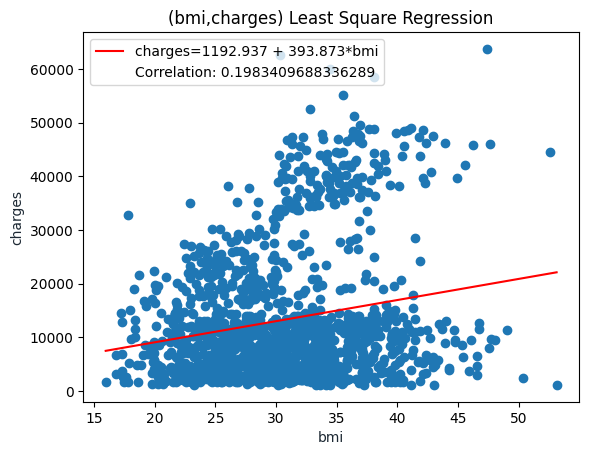

In [84]:
exp.lr_scatter('bmi', 'charges')